In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('patients_data.csv')

In [2]:
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,15-07-2016,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,28-04-2017,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,02-02-2018,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,25-08-2014,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,20-02-2022,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [3]:
# Serching for duplicate rows across all columns
duplicates = df[df.duplicated()]
print(duplicates)

# Droping duplicate rows across all columns
df = df.drop_duplicates()

Empty DataFrame
Columns: [Patient ID, Age, Gender, Ethnicity, Marital Status, Education Level, OCD Diagnosis Date, Duration of Symptoms (months), Previous Diagnoses, Family History of OCD, Obsession Type, Compulsion Type, Y-BOCS Score (Obsessions), Y-BOCS Score (Compulsions), Depression Diagnosis, Anxiety Diagnosis, Medications]
Index: []


In [4]:
#this will show the number of null or blank spaces in the data
df.isnull().sum()


Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

In [5]:

# Replace missing values with 0 in numerical columns
df = df.fillna({'Patient ID': 0,'Age':0, 'Duration of Symptoms (months)': 0, 'Y-BOCS Score (Obsessions)': 0, 'Y-BOCS Score (Compulsions)': 0})
df.head()

#Find the mode of 'Previous Diagnoses' column
previous_diagnoses_mode = df['Previous Diagnoses'].mode()[0]

# Find the mode of 'Medications' column
medications_mode = df['Medications'].mode()[0]

# Fill missing values with the mode
df['Previous Diagnoses'].fillna(previous_diagnoses_mode, inplace=True)
df['Medications'].fillna(medications_mode, inplace=True)




In [6]:
#Remove blank spaces in columns

df['Education Level'] = df['Education Level'].str.lstrip()
df['OCD Diagnosis Date'] = df['OCD Diagnosis Date'].str.lstrip()
df['Previous Diagnoses'] = df['Previous Diagnoses'].str.lstrip()
df['Family History of OCD'] = df['Family History of OCD'].str.lstrip()
df['Obsession Type'] = df['Obsession Type'].str.lstrip()
df['Compulsion Type'] = df['Compulsion Type'].str.lstrip()
df['Depression Diagnosis'] = df['Depression Diagnosis'].str.lstrip()
df['Anxiety Diagnosis'] = df['Anxiety Diagnosis'].str.lstrip()
df['Medications'] = df['Medications'].str.lstrip()

df.head()


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,15-07-2016,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,28-04-2017,180,MDD,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,02-02-2018,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,25-08-2014,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,20-02-2022,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,Benzodiazepine


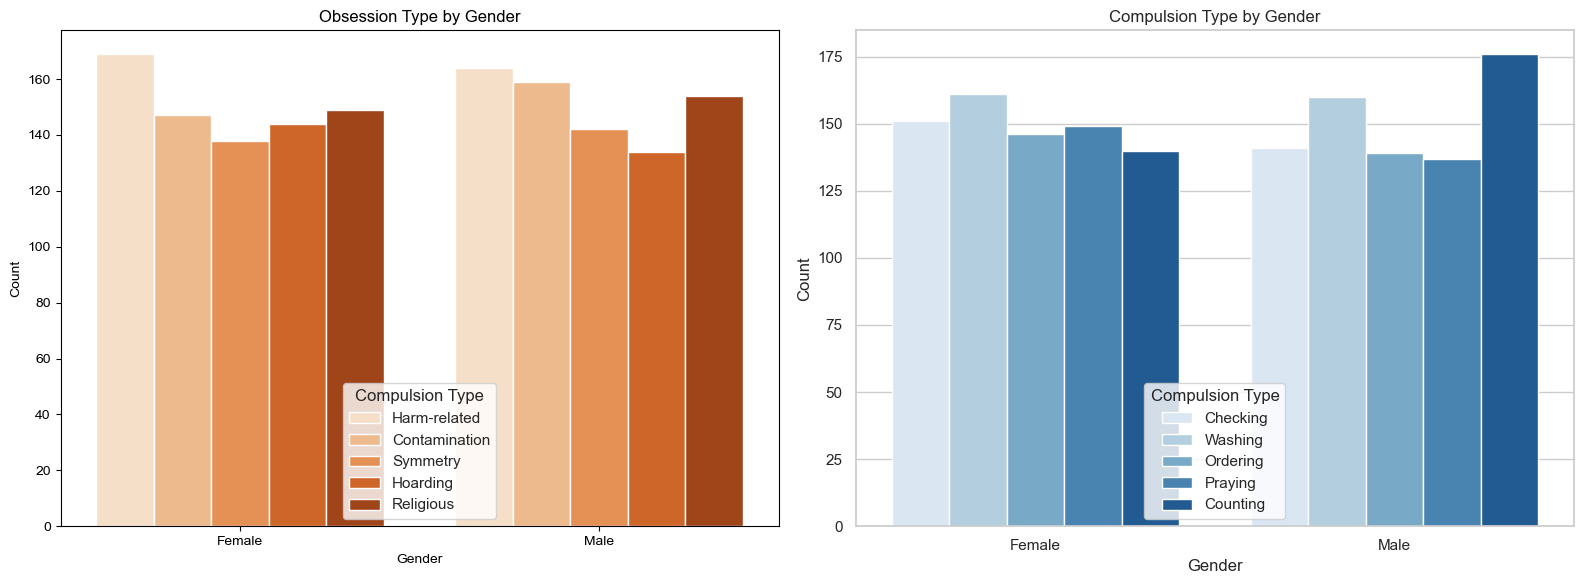

In [7]:
#creating a count plot using seaborn to visualize the distribution of Obsession & Compulsion Types across two genders

# Set the overall figure size
plt.figure(figsize=(16, 6))

# Subplot 1: Distribution of Obsession Types by Gender
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.set(style="whitegrid")
obsession_plot = sns.countplot(data=df, x='Gender', hue='Obsession Type', palette='Oranges')
plt.title('Obsession Type by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
obsession_plot.legend(loc='lower center', title='Compulsion Type')

# Subplot 2: Distribution of Compulsion Types by Gender
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.set(style="whitegrid")
compulsion_plot = sns.countplot(data=df, x='Gender', hue='Compulsion Type', palette='Blues')
plt.title('Compulsion Type by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
compulsion_plot.legend(loc='lower center', title='Compulsion Type')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined figure
plt.show()

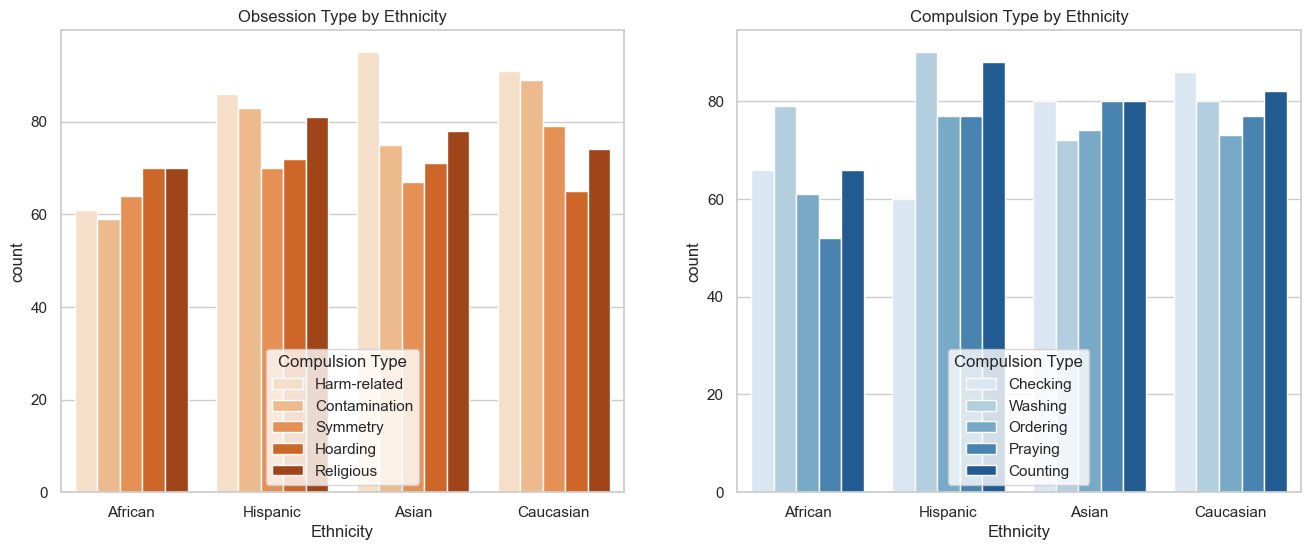

In [8]:
#creating a count plot using seaborn to visualize the distribution of Obsession & Compulsion Types across ethnicities \

# Set the overall figure size
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.set(style="whitegrid")
o_plot = sns.countplot(data=df, x='Ethnicity', hue='Obsession Type', palette='Oranges')
plt.title('Obsession Type by Ethnicity')
o_plot.legend(loc='lower center', title='Compulsion Type')


plt.subplot(1, 2, 2)
sns.set(style="whitegrid")
c_plot = sns.countplot(data=df, x='Ethnicity', hue='Compulsion Type', palette='Blues')
plt.title('Compulsion Type by Ethnicity')
c_plot.legend(loc='lower center', title='Compulsion Type')

plt.show()


C:\Users\Rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


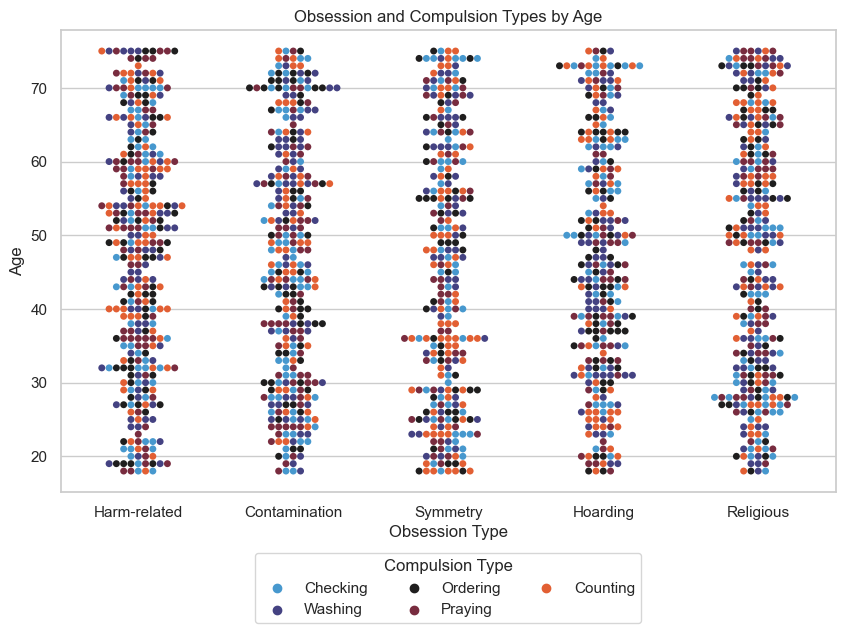

In [9]:
#creating a swarm plot using seaborn to visualize the distribution of Obsession & Compulsion Types across ages

# Create the swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Obsession Type', y='Age', hue='Compulsion Type', palette='icefire')

# Add a title
plt.title('Obsession and Compulsion Types by Age')

# Add axis titles
plt.xlabel('Obsession Type')
plt.ylabel('Age')

# Add a legend
plt.legend(title='Compulsion Type', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

# Display the plot
plt.show()


In [10]:
#swarm plot requires numeric value for y-axis , thus we are mapping Anxiety Diagnosis
anxiety_mapping = {
    'Yes': 1,
    'No': 0
}
df['Anxiety Diagnosis'] = df['Anxiety Diagnosis'].map(anxiety_mapping)
df.head()



,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,15-07-2016,203,MDD,No,Harm-related,Checking,17,10,Yes,1,SNRI
1,2406,69,Male,African,Divorced,Some College,28-04-2017,180,MDD,Yes,Harm-related,Washing,21,25,Yes,1,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,02-02-2018,173,MDD,No,Contamination,Checking,3,4,No,0,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,25-08-2014,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,1,SSRI
4,5824,56,Female,Hispanic,Married,High School,20-02-2022,168,PTSD,Yes,Hoarding,Ordering,39,18,No,0,Benzodiazepine


C:\Users\Rushi\AppData\Local\Temp\ipykernel_10532\3107936890.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Gender', y='Anxiety Diagnosis', hue='Depression Diagnosis', ci=None, palette='pastel')


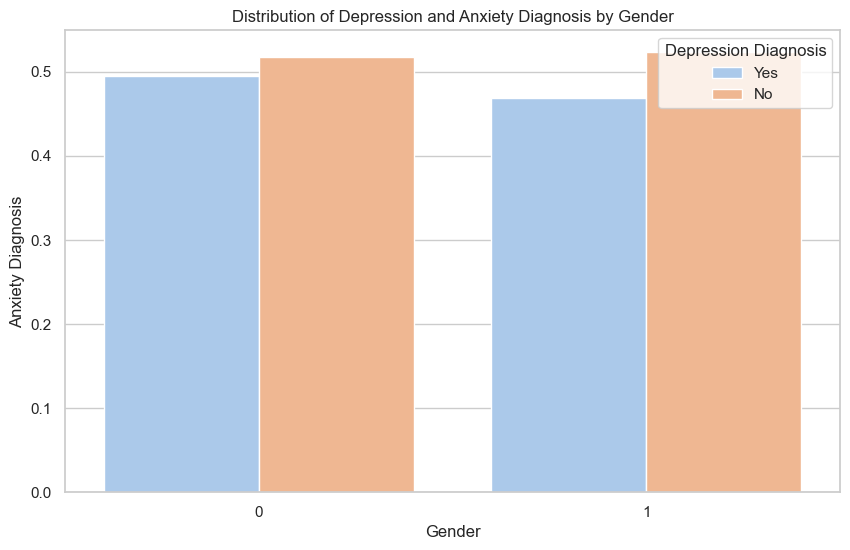

In [41]:
# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='Anxiety Diagnosis', hue='Depression Diagnosis', ci=None, palette='pastel')


# Add a title
plt.title('Distribution of Depression and Anxiety Diagnosis by Gender') 

plt.show()

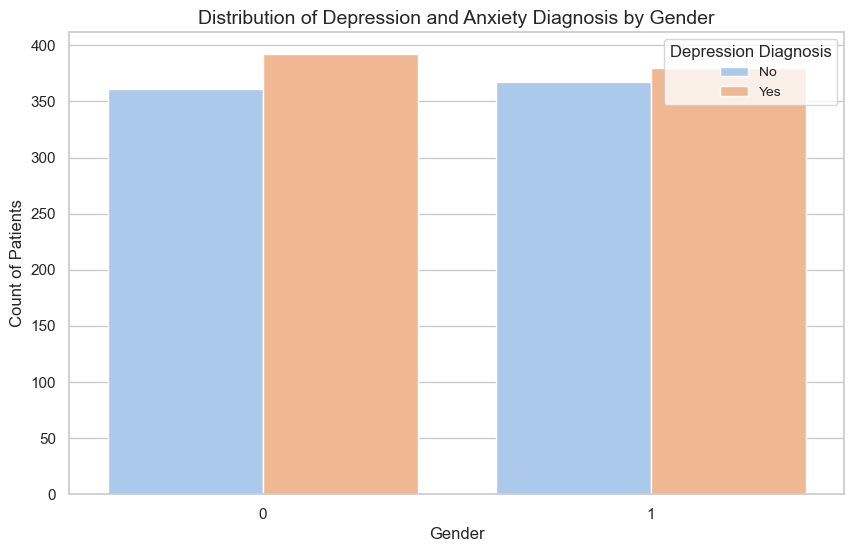

In [43]:
# Group the data to calculate counts for each category
counts = df.groupby(['Gender', 'Depression Diagnosis'])['Anxiety Diagnosis'].count().reset_index()
counts.rename(columns={'Anxiety Diagnosis': 'Count'}, inplace=True)

# Create the grouped bar plot with counts
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='Gender', y='Count', hue='Depression Diagnosis', palette='pastel')

# Add a title and labels
plt.title('Distribution of Depression and Anxiety Diagnosis by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)

# Customize the legend
plt.legend(title='Depression Diagnosis', loc='upper right', fontsize=10)

# Show the plot
plt.show()

In [11]:
#Mapping of categorical feilds for process optimization.
##can be done but for ease of understanding visualizations in this project we will not be using this peice of code.

Gender_mapping = {
    'Male': 0,
    'Female': 1
}
df['Gender'] = df['Gender'].map(Gender_mapping)


previous_diagnoses_mapping = {
    'MDD': 0,
    'GAD': 1,
    'Panic Disorder': 2,
    'PTSD': 3
}
df['Previous Diagnoses'] = df['Previous Diagnoses'].map(previous_diagnoses_mapping)


education_level_mapping = {
    'High School': 0,
    'Some College': 1,
    'College Degree': 2,
    'Graduate Degree': 3
}
df['Education Level'] = df['Education Level'].map(education_level_mapping)


ethnicity_mapping = {
    'Caucasian': 0,
    'Asian': 1,
    'African': 2,
    'Hispanic': 3
}
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping)



marital_status_mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2
}
df['Marital Status'] = df['Marital Status'].map(marital_status_mapping)

df.head() 

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,2,0,1,15-07-2016,203,0,No,Harm-related,Checking,17,10,Yes,1,SNRI
1,2406,69,0,2,2,1,28-04-2017,180,0,Yes,Harm-related,Washing,21,25,Yes,1,SSRI
2,1188,57,0,3,2,2,02-02-2018,173,0,No,Contamination,Checking,3,4,No,0,Benzodiazepine
3,6200,27,1,3,1,2,25-08-2014,126,3,Yes,Symmetry,Washing,14,28,Yes,1,SSRI
4,5824,56,1,3,1,0,20-02-2022,168,3,Yes,Hoarding,Ordering,39,18,No,0,Benzodiazepine
